#**Digital Recognition**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

loading - "MNIST Data Set" Contating Training samples = 60,000 Testing samples = 10,000 Tensorflow already contain MNIST data set which can be loaded using Keras



- this is basically handwritten characters based on 28x28 sized images of 0 to 9

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalizing pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step



- Flattening the images

In [3]:
# Flattening the images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Build Neural Network Model

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Output layer with 10 units for 0-9 digits

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Train the Model
model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2847 - accuracy: 0.9192 - val_loss: 0.1462 - val_accuracy: 0.9575
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1272 - accuracy: 0.9631 - val_loss: 0.1092 - val_accuracy: 0.9677
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9738 - val_loss: 0.1042 - val_accuracy: 0.9683
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9811 - val_loss: 0.0879 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.1037 - val_accuracy: 0.9692
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0926 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0872 - val_accuracy:

Replace 'index' with the index of the image you want to predict


In [11]:
index = 1
prediction = model.predict(X_test_flat[index].reshape(1, -1))
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 99ms/step


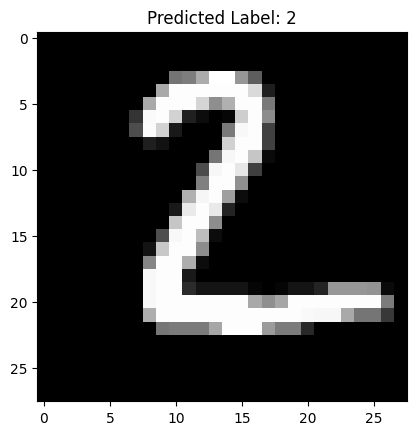

In [13]:
plt.imshow(X_test[index], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

In [14]:
index = 6
prediction = model.predict(X_test_flat[index].reshape(1, -1))
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 18ms/step


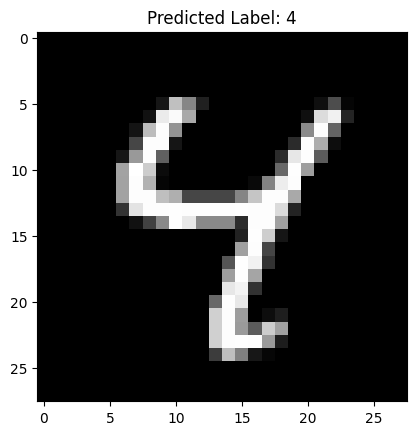

In [15]:
plt.imshow(X_test[index], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()